In [1]:
# import required packages
import numpy as np
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, mean_squared_error, precision_recall_curve, PrecisionRecallDisplay, RocCurveDisplay, DetCurveDisplay, r2_score
import matplotlib.pyplot as plt  # For creating plots

from ipynb.fs.defs.task3_1 import preprocessStarData, preprocessGWPData

In [2]:
# Load pre processed data
star_data = preprocessStarData()
gwp_data = preprocessGWPData()

[array(['GALAXY', 'QSO', 'STAR'], dtype='<U6')]
[array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)]
[array(['finishing', 'sweing'], dtype=object)]
[array(['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype=object)]


In [3]:
# Check data sets
print(star_data)
print(gwp_data)

[[0.45217391 0.09183086 0.45159189 0.64800655 0.        ]
 [0.83333333 0.11238889 0.8288413  0.89432004 0.        ]
 [0.35144928 0.09316979 0.35094862 0.54396505 0.        ]
 ...
 [0.20362319 0.02183899 0.20340363 0.399645   0.        ]
 [0.52898551 0.06622931 0.52805146 0.64991808 0.        ]
 [0.5826087  0.07874916 0.58171159 0.75040961 0.        ]]
[[1.         0.04763141 0.02722222 0.79733215]
 [0.93150685 0.03925589 0.         0.73618016]
 [1.         0.04157474 0.01388889 0.63927432]
 ...
 [0.79452055 0.03925589 0.         0.44198192]
 [0.93150685 0.02879515 0.         0.30695115]
 [0.8630137  0.04501839 0.         0.18158445]]


In [4]:
# Function to take data and model, along with model type and if it is for clustering, so suitable steps are taken and
# metrics are returned for assessing the model performance on the data returning the best train and test split
def SelectHoldoutSplits(data, model, model_type, clustering=False):
    test_sizes = [0.2, 0.25, 0.3]

    highest_score = 0
    best_test_size = 0

    x_train, x_test, y_train, y_test = train_test_split(data[:, : -1], data[:, -1], test_size=0.25)

    # Loop through test sizes using cross validation to find best split
    for ts in test_sizes:
        temp_x_train, temp_x_test, temp_y_train, temp_y_test = train_test_split(data[:, : -1], data[:, -1], test_size=ts) 
        scores = cross_val_score(model, temp_x_train, temp_y_train, cv=5)
        
        # Using a different formula for calculating score if the model tested is a clustering model
        if clustering==True:
            model.fit(temp_x_train)
            scores = np.sum(model.predict(temp_x_test) == temp_y_test) / temp_y_test.size

        print(f"Test size: {ts}, Cross-validation score: {scores.mean():.5f}")

        # Check for highest score out of the splits and save to variable
        if scores.mean() > highest_score: 
            highest_score = scores.mean()
            best_test_size = ts
            x_train, x_test, y_train, y_test = temp_x_train, temp_x_test, temp_y_train, temp_y_test
            
        # Form confusion matrices for train test split if classification type
        if model_type=='classification':
            model.fit(temp_x_train, temp_y_train)
            y_pred = model.predict(x_test)
            ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
            plt.show()
        elif model_type=='regression': # Calculate MSE and RMSE for train test split if classification type
            model.fit(temp_x_train, temp_y_train)
            y_pred = model.predict(temp_x_test)
            mse = np.sum((temp_y_test - y_pred)**2) / temp_y_test.size
            rmse = np.sqrt(np.sum((temp_y_test - y_pred)**2) / temp_y_test.size)
            print(f"MSE: {mse}, RMSE: {rmse}")
    
    return x_train, x_test, y_train, y_test

C:\Users\itsfl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\itsfl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\itsfl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test size: 0.2, Cross-validation score: 0.94711


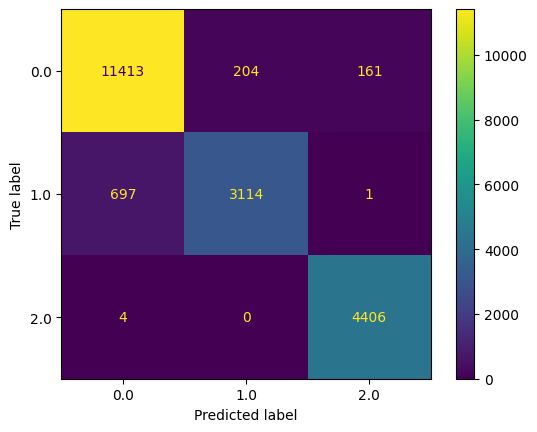

C:\Users\itsfl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\itsfl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\itsfl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test size: 0.25, Cross-validation score: 0.94617


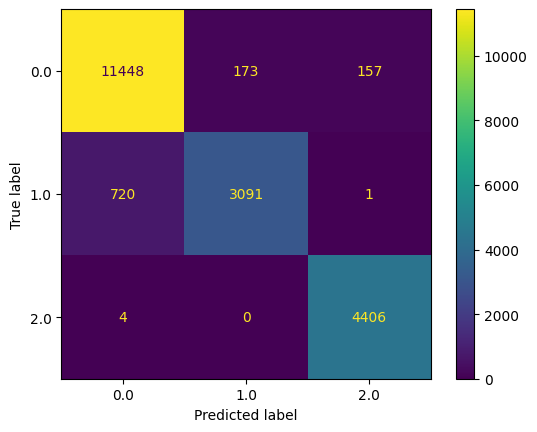

C:\Users\itsfl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\itsfl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\itsfl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Test size: 0.3, Cross-validation score: 0.94664


C:\Users\itsfl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


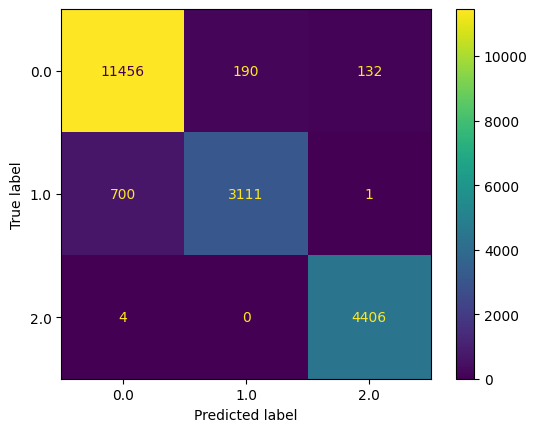

In [5]:
star_x_train, star_x_test, star_y_train, star_y_test = SelectHoldoutSplits(star_data, MLPClassifier(max_iter=200, hidden_layer_sizes=(10,)), 'classification')

In [6]:
# The splits seem to be generally consistent in their accuracy as well as the distribution of correct and incorrect classifications, 
# the highest accuracy this will be used going forward where applicable

In [7]:
# Use RandomizedSearchCV for hyper parameter tuning, in the interest of saving resources the hidden layer nodes number is set to 10 
# Initialising classifier using adam as it is said to be best suited for larger datasets
mlp = MLPClassifier(hidden_layer_sizes=(10,), solver='adam')

In [8]:
# Function to take specified training data, model and parameters to test with RandomizedSearchCV and return best parameters found
def findBestParams(x_train, y_train, model, param_grid):
    rs = RandomizedSearchCV(model, param_grid, random_state=0, n_jobs=2)
    search = rs.fit(x_train, y_train)
    
    print(search.best_params_)
    return search.best_params_

In [9]:
mlp.get_params

<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=(10,))>

In [10]:
# Setting parameters applicable to adam solver and returning best results 
params = {'activation': ['relu', 'tanh', 'logistic'],
              'batch_size': [320, 640, 1280],
              'shuffle': [True, False],
              'tol': [0.0001, 0.001, 0.00001],
              'alpha': [0.00001, 0.0001, 0.001, 0.01]}

mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(100,), **findBestParams(star_x_train, star_y_train, mlp, params))

{'tol': 0.0001, 'shuffle': False, 'batch_size': 320, 'alpha': 1e-05, 'activation': 'tanh'}


In [11]:
# Function to assess inputted model and data by returning score, calculating precision and recall and plotting visualisations
def AssessClassification(x_train, x_test, y_train, y_test, model):
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"Accuracy Score: {score}")
    
    y_pred = model.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
    
    # Calculating precision and recall using the confusion matrix for model
    cm = confusion_matrix(y_test, y_pred)
    # Find true positives, false positives and false negatives for class 0
    tp_class0 = cm[0][0]
    fp_class0 = cm[1][0]+cm[2][0]
    fn_class0 = cm[0][1]+cm[0][2]
    # Find true positives, false positives and false negatives for class 1
    tp_class1 = cm[1][1]
    fp_class1 = cm[0][1]+cm[2][1]
    fn_class1 = cm[1][0]+cm[1][2]
    # Find true positives, false positives and false negatives for class 2
    tp_class2 = cm[2][2]
    fp_class2 = cm[0][2]+cm[1][2]
    fn_class2 = cm[2][0]+cm[2][1]

    # Calculate precision
    precision = (tp_class0+tp_class1+tp_class2)/((tp_class0+tp_class1+tp_class2)+(fp_class0+fp_class1+fp_class2))
    print(f"Precision Score: {precision}")
    # Calculate recall 
    recall = (tp_class0+tp_class1+tp_class2)/((tp_class0+tp_class1+tp_class2)+(fn_class0+fn_class1+fn_class2))
    print(f"Recall Score: {recall}")

In [12]:
mlp.get_params

<bound method BaseEstimator.get_params of MLPClassifier(activation='tanh', alpha=1e-05, batch_size=320, shuffle=False)>

Accuracy Score: 0.94765


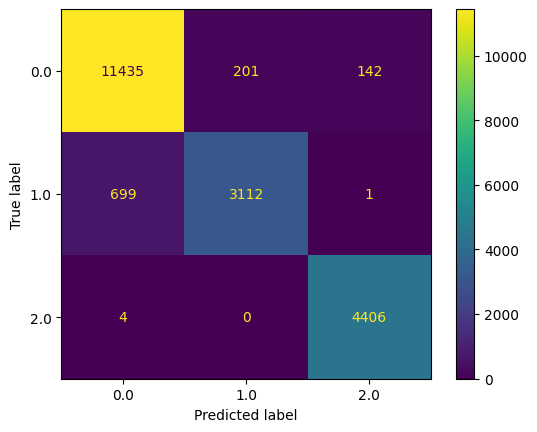

Precision Score: 0.94765
Recall Score: 0.94765


In [13]:
AssessClassification(star_x_train, star_x_test, star_y_train, star_y_test, mlp.set_params(solver='adam', hidden_layer_sizes=(100,)))

In [14]:
# The hyperparameterisation seems to have improved the model by a significant amount, although the general trend in class accuracy
# is similar, it seems there has been an increase in false positives in certain classes

In [15]:
gwp_x_train, gwp_x_test, gwp_y_train, gwp_y_test = SelectHoldoutSplits(gwp_data, SVR(), 'regression')

Test size: 0.2, Cross-validation score: 0.16997
MSE: 0.029247959676757654, RMSE: 0.17102034872130759
Test size: 0.25, Cross-validation score: 0.16289
MSE: 0.034711372503529486, RMSE: 0.18630988300014975
Test size: 0.3, Cross-validation score: 0.17227
MSE: 0.03295694561576524, RMSE: 0.18154047927601502


In [16]:
# Use RandomizedSearchCV to find optimal parameters
params_reg = {'kernel': ['poly'],
         'degree': [3, 6, 9],
         'gamma': ['auto', 'scale'],
         'tol': [0.0001, 0.001, 0.01],
         'C': [1, 10, 100, 1000],
         'epsilon': [0.01, 0.1, 0.2],
         'shrinking': [True, False],
         'verbose': [False]}

svr = SVR(**findBestParams(gwp_x_train, gwp_y_train, SVR(), params_reg))

{'verbose': False, 'tol': 0.001, 'shrinking': True, 'kernel': 'poly', 'gamma': 'auto', 'epsilon': 0.1, 'degree': 6, 'C': 10}


In [17]:
# Function to assess results of regression model, taking the training and test data in and displaying scatter and coefficient graphs
# along with Accuracy scores and error scores
def AssessRegression(data, x_train, x_test, y_train, y_test, model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # Scatter plot of actual and predicted values for the target variable for first 10 samples
    plt.plot(y_test[:10], 'o', label='Actual')
    plt.plot(y_pred[:10], 'o', label='Prediction')

    # Add the legend to reflect which point denote which quantity
    plt.legend()
    plt.xlabel('Index of sample') # label of x-axis
    plt.ylabel('Actual/Predicted value of the target') # label of y-axis
    
    plt.show()
    
    print(f"Accuracy Score: {model.score(x_test, y_test)}")
    print(f"Cross-Validation Score: {(cross_val_score(model, data[:, : -1], data[:, -1], cv=8)).mean()}")
    print(f"MSE: {np.sum((y_test - y_pred)**2) / y_test.size}")
    print(f"RMSE: {np.sqrt(np.sum((y_test - y_pred)**2) / y_test.size)}")
    
    
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

    # Plot outputs
    plt.scatter(x_test[10:, np.newaxis, 2], y_test[10:,], color="black")
    plt.plot(x_test[:, np.newaxis, 2], y_pred, color="blue", linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

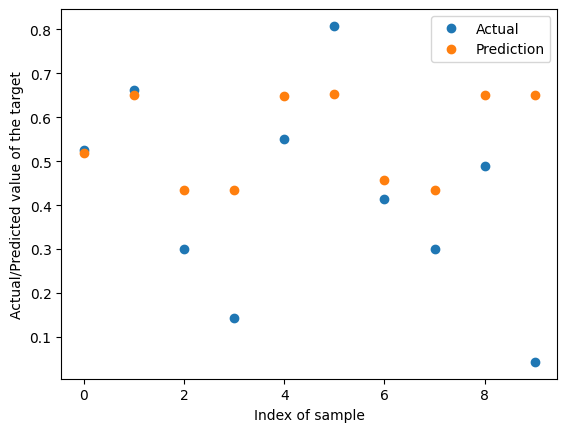

Accuracy Score: 0.1558128827493911
Cross-Validation Score: 0.13720466004985304
MSE: 0.032440401890995216
RMSE: 0.1801121925106549
Mean squared error: 0.03
Coefficient of determination: 0.16


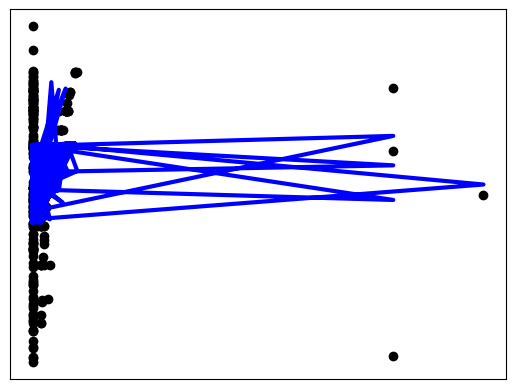

In [18]:
AssessRegression(gwp_data, gwp_x_train, gwp_x_test, gwp_y_train, gwp_y_test, svr)

# There is a range of accuracy displayed, where it can be seen that some predictions are significantly off the actual values while there are also some which do come much closer. 
# From looking at the coefficient graph it seems outlier values which are very far away from the trend, this have a large contribution to the models inaccuracies.

# Through multiple reruns of the testing the splits and the svr after RandomisedSearchCV there seems to be that improvement is not guaranteed from the hyper parametrisation although there can be some substantial improvement

# Linear Regression would not be a suitable model for the star dataset as the star dataset only has catergorical target values. Linear Regression is designed to predict continuous numerical target values, using linear equations therefore it would not function to identify classes for given samples. Only classification models would be suitable for this kind of dataset, where the target values are categorical and can be modelled as numerical classes.